 # Heart Disease Prediction Using KNN with Optimized Accuracy
 
 
 #### By Chris Jung, Jamie Ma and Amy Wu
 
 ### Background and Motivation
- ***Heart disease*** is the leading casue of death  for men, women, and people of most racial and ethnic groups in most of countries in the world, even in the countries with developed medical technologies including Canada and US.<br>
 About 659,000 people in the United States die from heart disease each year which accounts for 1 in every 4 deaths. It costs the United States about $363 billion each year from 2016 to 2017. [Reference 1](https://www.cdc.gov/heartdisease/facts) , [Reference 2](https://www.who.int/health-topics/cardiovascular-diseases)
- Thus, it would be beneficial both for our society and individuals if we can analyze factors cause heart disease, predict heart disease using the analysis and prevent it from happening beforehand. 

### Project Goal
- For this reason, we are going to use actual medical record to make a **heart disease prediction model** using k-nearest neighbors(KNN) classification algorithm using the data.
- Furthermore, we will **optimize the accuracy** of our model by tunning the parameters of KNN models such as predictors and the value of k. By adjustubng the number and the kinds of predictors, we will also find which factors are more useful to predict heart disease.


### Data
- The dataset is achieved from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)
- Each observation contains **a person's 14 types medical information** including the presence of heart disease (The original data contains 76 attributes, but we will use a subset of 14 of them as sugguested in the original source of data)
- 14 Attributes of the data:
    1. age: age of the person in years
    2. sex: 1 = male; 0 = female
    3. cp: chest pain type(Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
    4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
    5. chol: serum cholestoral in mg/dl
    6. fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
    7. restecg: resting electrocardiographic results(Value 0: normal, Value 1: having ST-T wave abnormality, Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria)
    8. thalach: maximum heart rate achieved in bpm(Beat Per Minute)
    9. exang: exercise induced angina (1 = yes; 0 = no)
    10. oldpeak: ST depression induced by exercise relative to rest
    11. slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
    12. ca: umber of major vessels (0-3) colored by flourosopy
    13. thal: blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
    14. class: presence of heart disease. integer valued from 0 (no presence) to 4
##### >> We will predict the correct **class** of data using KNN classification model using other 13 attributes

In [1]:
#loads the libraries
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [2]:
#sets the seed
set.seed(1)

#reads in the data table
original_data <- read_delim("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/cleveland.data",
                col_names = paste(1:8),
                col_type = c("5" = "d"),
                delim = " ")

#adding an index column to the data frame for future reference
data <- original_data %>%
        mutate(index = as.numeric(rownames(original_data))) %>%
        filter(index <= 2820) #excluding data after the 2820th row, as the data is unusable because there is too much missing data
head(data)

Warning message:
“1102 parsing failures.
row col  expected    actual                                                                                     file
  1  -- 8 columns 7 columns 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/cleveland.data'
 10  5  a double  name      'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/cleveland.data'
 10  -- 8 columns 5 columns 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/cleveland.data'
 11  -- 8 columns 7 columns 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/cleveland.data'
 20  5  a double  name      'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/cleveland.data'
... ... ......... ......... ........................................................................................
See problems(...) for more details.
”


1,2,3,4,5,6,7,8,index
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.0,0,63,1,-9,-9.0,-9,NA,1
-9.0,1,145,1,233,-9.0,50,20,2
1.0,-9,1,2,2,3.0,81,0,3
0.0,0,0,0,1,10.5,6,13,4
150.0,60,190,90,145,85.0,0,0,5
2.3,3,-9,172,0,-9.0,-9,-9,6


In [3]:
#creates an individual data frame for each section of data
section_1 <- data %>%
            filter((index - 1) %% 10 == 0) %>%
            select(-"8") #removing columns that have no values
section_2 <- data %>%
            filter((index - 1) %% 10 == 1) %>%
            mutate(index = index - 1)
section_3 <- data %>%
            filter((index - 1) %% 10 == 2) %>%
            mutate(index = index - 2)
section_4 <- data %>%
            filter((index - 1) %% 10 == 3) %>%
            mutate(index = index - 3)
section_5 <- data %>%
            filter((index - 1) %% 10 == 4) %>%
            mutate(index = index - 4)
section_6 <- data %>%
            filter((index - 1) %% 10 == 5) %>%
            mutate(index = index - 5)
section_7 <- data %>%
            filter((index - 1) %% 10 == 6) %>%
            mutate(index = index - 6)
section_8 <- data %>%
            filter((index - 1) %% 10 == 7) %>%
            mutate(index = index - 7)
section_9 <- data %>%
            filter((index - 1) %% 10 == 8) %>%
            mutate(index = index - 8)
section_10 <- data %>%
            filter((index - 1) %% 10 == 9) %>%
            mutate(index = index - 9) %>%
            select(-"5",-"6",-"7",-"8") #removing columns that have no values

#combines all of the individual data tables into one data table
heart_data_merge <- merge(section_1, section_2, by="index") %>%
            merge(section_3, by = "index") %>%
            merge(section_4, by = "index") %>%
            merge(section_5, by = "index") %>%
            merge(section_6, by = "index") %>%
            merge(section_7, by = "index") %>%
            merge(section_8, by = "index") %>%
            merge(section_9, by = "index") %>%
            merge(section_10, by = "index")

#makes sure the list only contains the index column name
cnames <- c("index")
#numbers the columns 1 to max
for (i in 1:(ncol(heart_data_merge)-1)){
    if (i == 58){
        cnames <- c(cnames, c("diagnosis"))  #renames the 
    } else {
        cnames <- c(cnames, paste("Stat", c(i)))
    }
}

#renames the column names to the appriate ones
colnames(heart_data_merge) <- cnames

#removes the index column
heart_data <- select(heart_data_merge, -index) %>%
            mutate(diagnosis = as_factor(diagnosis))
head(heart_data_merge)

Warning message in merge.data.frame(., section_4, by = "index"):
“column names ‘1.x’, ‘2.x’, ‘3.x’, ‘4.x’, ‘5.x’, ‘6.x’, ‘7.x’, ‘1.y’, ‘2.y’, ‘3.y’, ‘4.y’, ‘5.y’, ‘6.y’, ‘7.y’ are duplicated in the result”
Warning message in merge.data.frame(., section_5, by = "index"):
“column names ‘1.x’, ‘2.x’, ‘3.x’, ‘4.x’, ‘5.x’, ‘6.x’, ‘7.x’, ‘1.y’, ‘2.y’, ‘3.y’, ‘4.y’, ‘5.y’, ‘6.y’, ‘7.y’, ‘8.x’, ‘8.y’ are duplicated in the result”
Warning message in merge.data.frame(., section_6, by = "index"):
“column names ‘1.x’, ‘2.x’, ‘3.x’, ‘4.x’, ‘5.x’, ‘6.x’, ‘7.x’, ‘1.y’, ‘2.y’, ‘3.y’, ‘4.y’, ‘5.y’, ‘6.y’, ‘7.y’, ‘8.x’, ‘1.x’, ‘2.x’, ‘3.x’, ‘4.x’, ‘5.x’, ‘6.x’, ‘7.x’, ‘8.y’, ‘1.y’, ‘2.y’, ‘3.y’, ‘4.y’, ‘5.y’, ‘6.y’, ‘7.y’ are duplicated in the result”
Warning message in merge.data.frame(., section_7, by = "index"):
“column names ‘1.x’, ‘2.x’, ‘3.x’, ‘4.x’, ‘5.x’, ‘6.x’, ‘7.x’, ‘1.y’, ‘2.y’, ‘3.y’, ‘4.y’, ‘5.y’, ‘6.y’, ‘7.y’, ‘8.x’, ‘1.x’, ‘2.x’, ‘3.x’, ‘4.x’, ‘5.x’, ‘6.x’, ‘7.x’, ‘8.y’, ‘1.y’, ‘2.y’, ‘3

,index,Stat 1,Stat 2,Stat 3,Stat 4,Stat 5,Stat 6,Stat 7,Stat 8,Stat 9,⋯,Stat 66,Stat 67,Stat 68,Stat 69,Stat 70,Stat 71,Stat 72,Stat 73,Stat 74,Stat 75
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,0,63,1,-9,-9,-9,-9,1,⋯,-9,1,1,1,1,1,1,1,-9,-9
2,11,2,0,67,1,-9,-9,-9,-9,4,⋯,-9,1,1,1,1,1,1,1,-9,-9
3,21,3,0,67,1,-9,-9,-9,-9,4,⋯,-9,2,2,1,1,1,7,3,-9,-9
4,31,4,0,37,1,-9,-9,-9,-9,3,⋯,-9,1,1,1,1,1,1,1,-9,-9
5,41,6,0,41,0,-9,-9,-9,-9,2,⋯,-9,1,1,1,1,1,1,1,-9,-9
6,51,7,0,56,1,-9,-9,-9,-9,2,⋯,-9,1,1,1,1,1,1,1,-9,-9


In [4]:
#creates a data table with only the 14 attributes listed in published experiments
heart_data_attributes <- heart_data %>%
                        select("Stat 3",
                               "Stat 4",
                               "Stat 9",
                               "Stat 10",
                               "Stat 12",
                               "Stat 16",
                               "Stat 19",
                               "Stat 32",
                               "Stat 38",
                               "Stat 40",
                               "Stat 41",
                               "Stat 44",
                               "Stat 51",
                               diagnosis)

#renames the columns
colnames(heart_data_attributes) <- c("age",
                                     "sex",
                                     "cp",
                                     "trestbps",
                                     "chol",
                                     "fbs",
                                     "restecg",
                                     "thalach",
                                     "exang",
                                     "oldpeak",
                                     "slope",
                                     "ca",
                                     "thal",
                                     "Class")

head(heart_data_attributes)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
2,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
3,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
4,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
5,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
6,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0


In [5]:
#splits the data into training and test data
heart_split <- initial_split(heart_data_attributes, prop = 0.75, strata = Class)
heart_train <- training(heart_split)
heart_test <- testing(heart_split) 

In [6]:
#creates a table that displays the count and percentage of each class in the training data
heart_proportions <- heart_train %>%
                      group_by(Class) %>%
                      summarize("count" = n()) %>%
                      mutate(percent = 100*count/nrow(heart_train))
heart_proportions

`summarise()` ungrouping output (override with `.groups` argument)



Class,count,percent
<fct>,<int>,<dbl>
0,118,55.660377
1,38,17.924528
2,22,10.377358
3,24,11.320755
4,10,4.716981


In [7]:
#creates a data table with the mean, median, min, and max values of each of the variables
heart_averages_1 <- heart_train %>%
                    select(-Class) %>%
                    map_df(median) %>% 
                    mutate(Stat = "median")
heart_averages_2 <- roun(heart_train %>%
                    select(-Class) %>%
                    map_df(mean) %>% 
                    map_df() %>%
                    mutate(Stat = "mean")
heart_averages_3 <- heart_train %>%
                    select(-Class) %>%
                    map_df(min) %>% 
                    mutate(Stat = "min")
heart_averages_4 <- heart_train %>%
                    select(-Class) %>%
                    map_df(max) %>% 
                    mutate(Stat = "max")

#combines all of the statistical measurements into one table
heart_averages <- rbind(heart_averages_1, heart_averages_2, heart_averages_3, heart_averages_4)
heart_averages
?round

ERROR: Error in parse(text = x, srcfile = src): <text>:11:1: unexpected symbol
10:                     mutate(Stat = "mean")
11: heart_averages_3
    ^


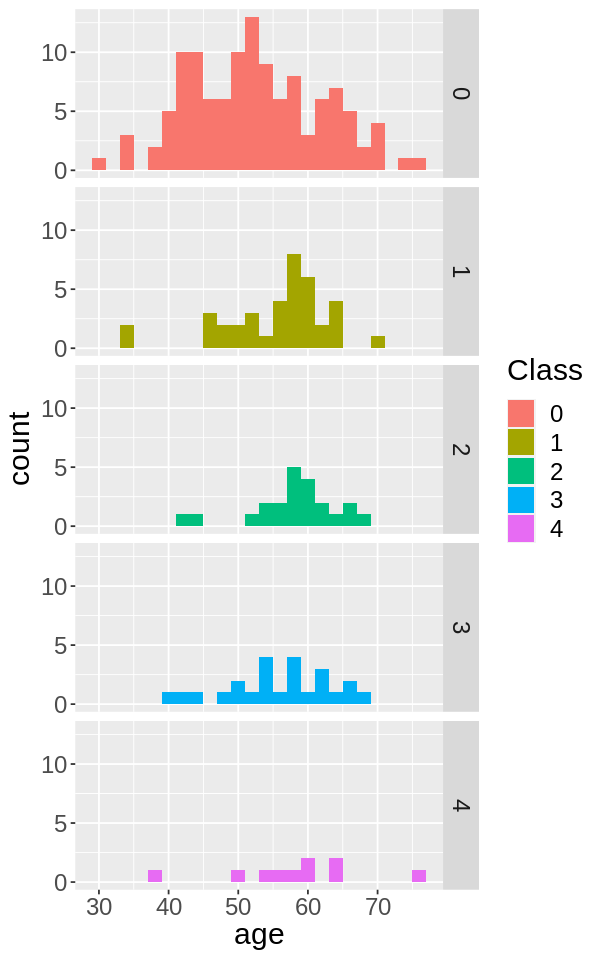

In [8]:
options(repr.plot.width = 5, repr.plot.height = 8)


age_plot <- ggplot(heart_train, aes(x=age, fill = Class)) +
            geom_histogram(binwidth = 2) +
            theme(text = element_text(size = 18)) + 
            facet_grid(rows = vars(Class))
age_plot